# Mushroom Dataset

### Importing required libraries

In [1]:
import numpy as np               # for mathematical stuff and vectorization
import pandas as pd              # for using dataframes
import matplotlib.pyplot as plt  # for plotting graphs
import seaborn as sns            # for making better graphs

# setting up display options
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# for showing graphs within the notebook
%matplotlib inline

### Reading in the Datasets
#### And basic exploration

In [2]:
# reading in the training set
train_set = pd.read_csv('mushroom_train.csv')
train_set.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,t,?,215,s,k,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,e,e,94,s,s,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,e,?,244,s,s,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,t,?,286,k,s,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,e,c,110,s,s,w,w,p,w,36,o,p,n,s,m


In [3]:
train_set.shape

(5686, 25)

In [4]:
train_set.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


In [5]:
# reading in the test set
test_set = pd.read_csv('mushroom_test.csv')
test_set.head(20)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,b,32,s,s,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,b,7,k,k,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,c,2,s,s,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,b,2,k,k,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,c,10,s,s,w,w,p,w,24,o,p,k,n,m
5,f,f,y,f,f,f,c,b,h,e,b,89,k,k,n,b,p,w,23,o,l,h,y,d
6,x,f,p,f,c,f,c,n,n,e,b,44,s,s,w,w,p,w,24,o,p,n,s,d
7,k,s,n,f,n,a,c,b,n,e,?,564,s,s,o,o,p,o,24,o,p,b,v,l
8,f,y,n,t,n,f,c,b,p,t,b,67,s,s,p,w,p,w,23,o,p,n,v,d
9,f,s,w,t,f,f,c,b,h,t,b,17,s,s,w,w,p,w,23,o,p,h,v,u


In [6]:
test_set.shape

(2438, 24)

We have:

1. **class** as the *Target* value and 
2. all the other columns are features of the *Predictor*.
3. the test data has one less column which is the **class** that we need to predict

For now test_set will be ignored and majority of analysis will be carried out on the train_set as it has sufficient number of observations to give us a rough idea and our model will entirely based on the train_set.

Finding the datatypes of the features and target.

In [7]:
train_set.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

It can be observed that:

1. all the columns are of type *object* 
2. except the **radius** and **weight** which are of type *int64*.


It turns out that as per data description provided:

1. the *object* type columns are *categorical* in nature 
2. and the *int64* type columns are *continuous* in nature.

This explains and supports the information obtained via `training_set.describe()`.

It is essential to mention here that there are missing values in *stalk-root* feature which will be dealt with eventually.


### Visualizations and Exploratory Data Analysis

There are two *continuous* variables. They are tackled first via histograms.

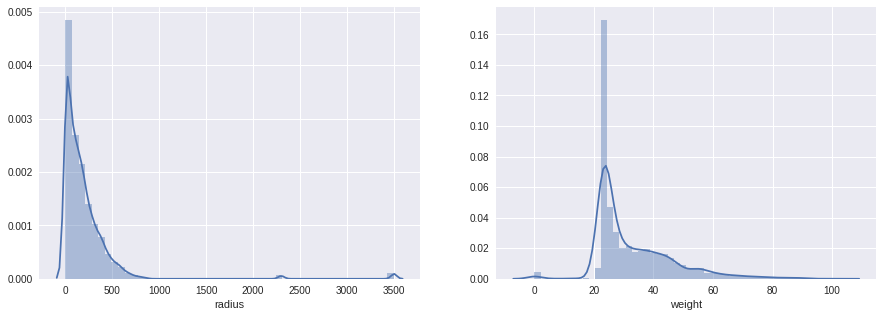

In [8]:
# histograms plotted here with kdes
f, axes = plt.subplots(ncols = 2, figsize = (15,5))
sns.distplot(train_set['radius'], kde = True, ax = axes[0])
sns.distplot(train_set['weight'], kde = True, ax = axes[1])
plt.show()

The distribution of *radius* and *weight* is apparent here. Multi-modality is not observed except slight bumps in *weight* towards the end. However, it will be tough to discern the reason for these bumps considering the relatively good number of features each having multiple categories.

Now the categorical variables are dealt with using countplots.

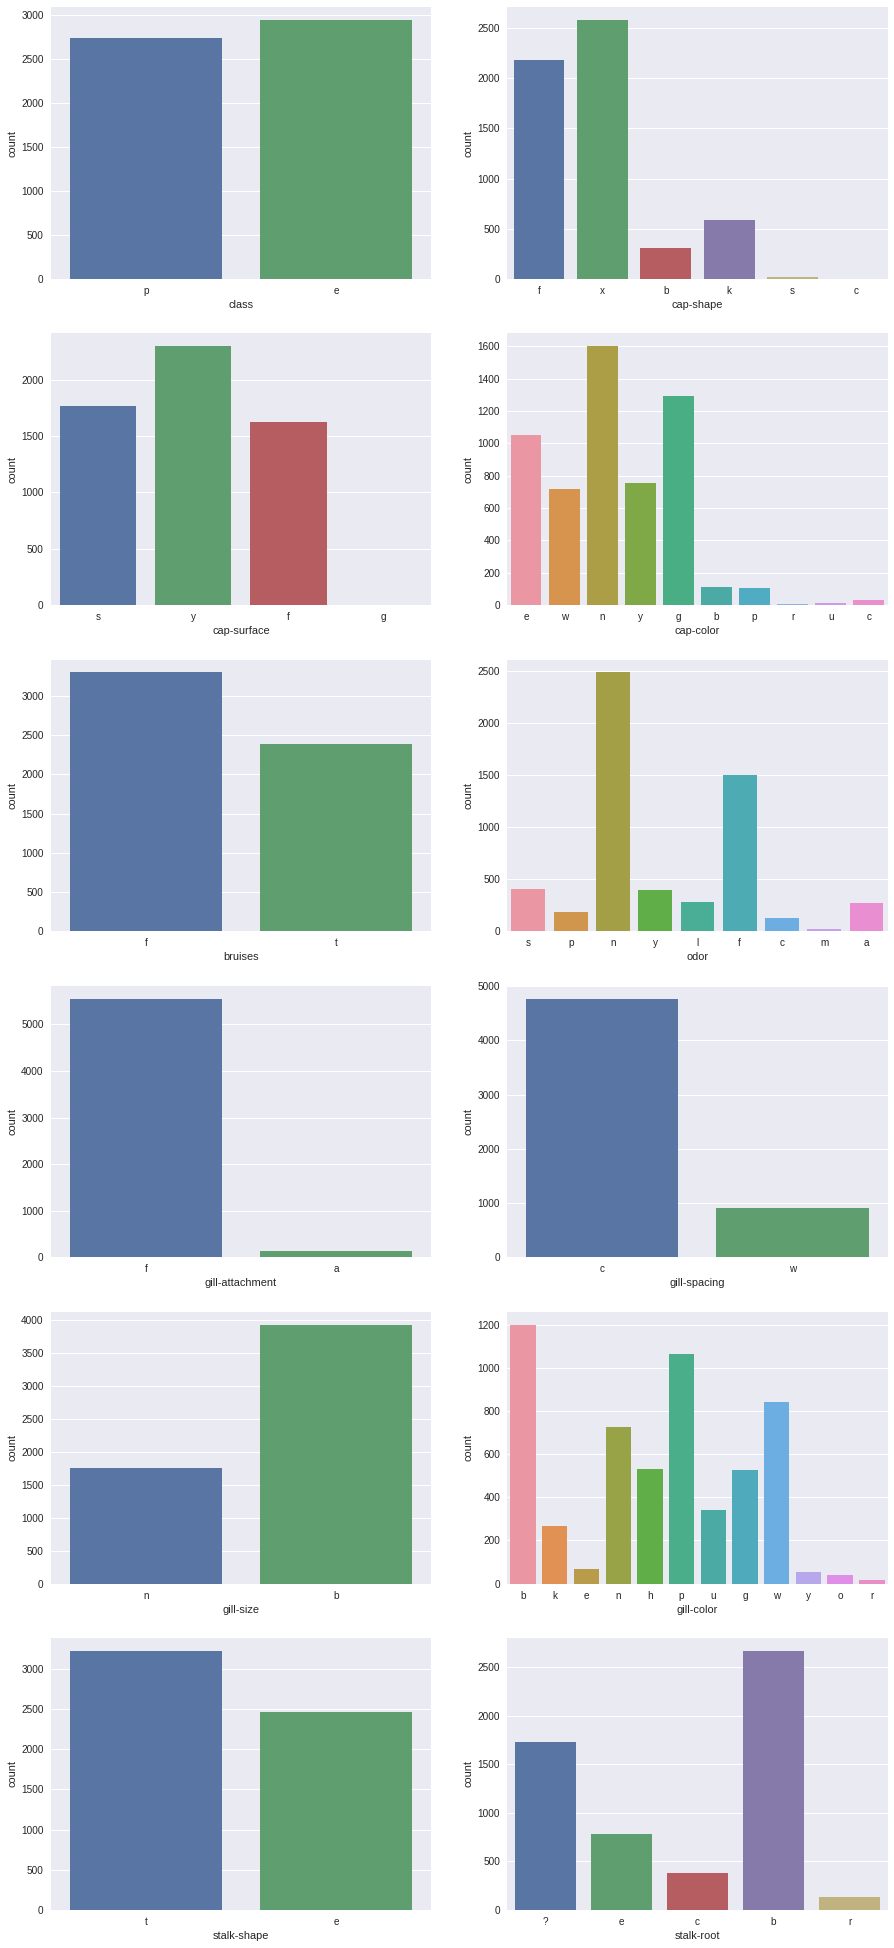

In [9]:
# bar charts here
f, axes = plt.subplots(ncols = 2, nrows = 6, figsize = (15,35))

sns.countplot(x = train_set['class'], ax = axes[0][0])
sns.countplot(x = train_set['cap-shape'], ax = axes[0][1])
sns.countplot(x = train_set['cap-surface'], ax = axes[1][0])
sns.countplot(x = train_set['cap-color'], ax = axes[1][1])
sns.countplot(x = train_set['bruises'], ax = axes[2][0])
sns.countplot(x = train_set['odor'], ax = axes[2][1])
sns.countplot(x = train_set['gill-attachment'], ax = axes[3][0])
sns.countplot(x = train_set['gill-spacing'], ax = axes[3][1])
sns.countplot(x = train_set['gill-size'], ax = axes[4][0])
sns.countplot(x = train_set['gill-color'], ax = axes[4][1])
sns.countplot(x = train_set['stalk-shape'], ax = axes[5][0])
sns.countplot(x = train_set['stalk-root'], ax = axes[5][1])
plt.show()

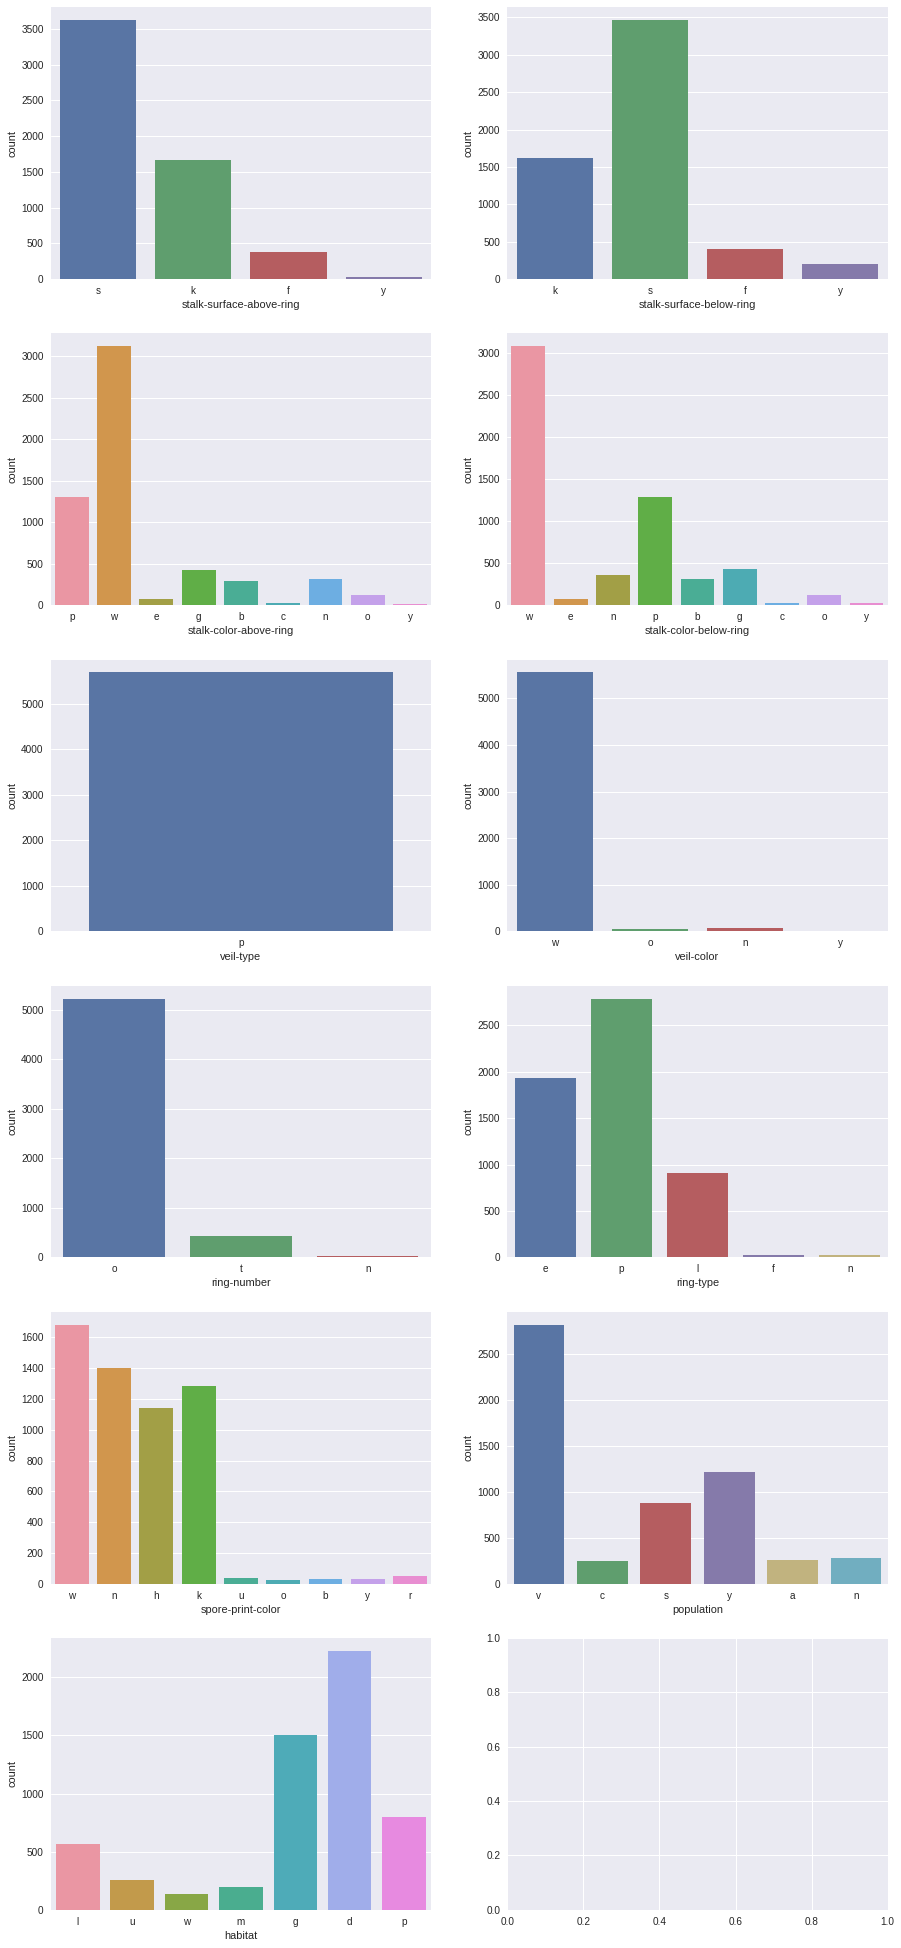

In [10]:
# some more bar charts
f, axes = plt.subplots(ncols = 2, nrows = 6, figsize = (15,35))

sns.countplot(x = train_set['stalk-surface-above-ring'], ax = axes[0][0])
sns.countplot(x = train_set['stalk-surface-below-ring'], ax = axes[0][1])
sns.countplot(x = train_set['stalk-color-above-ring'], ax = axes[1][0])
sns.countplot(x = train_set['stalk-color-below-ring'], ax = axes[1][1])
sns.countplot(x = train_set['veil-type'], ax = axes[2][0])
sns.countplot(x = train_set['veil-color'], ax = axes[2][1])
sns.countplot(x = train_set['ring-number'], ax = axes[3][0])
sns.countplot(x = train_set['ring-type'], ax = axes[3][1])
sns.countplot(x = train_set['spore-print-color'], ax = axes[4][0])
sns.countplot(x = train_set['population'], ax = axes[4][1])
sns.countplot(x = train_set['habitat'], ax = axes[5][0])
plt.show()

Some obvious conclusions can be drawn from this:

1. for veil-type, only *p* exists so it is not at all useful for our purpose
2. there are missing values denoted by *?* in *stalk-root* and their count is pretty high

The above graphs provide sufficient information about the relative amount and therefore separate stacked bar charts and pie charts are not being used.

The relationship of the *continuous* variables w.r.t. *target* output can be shown via violinplots and boxplots too.

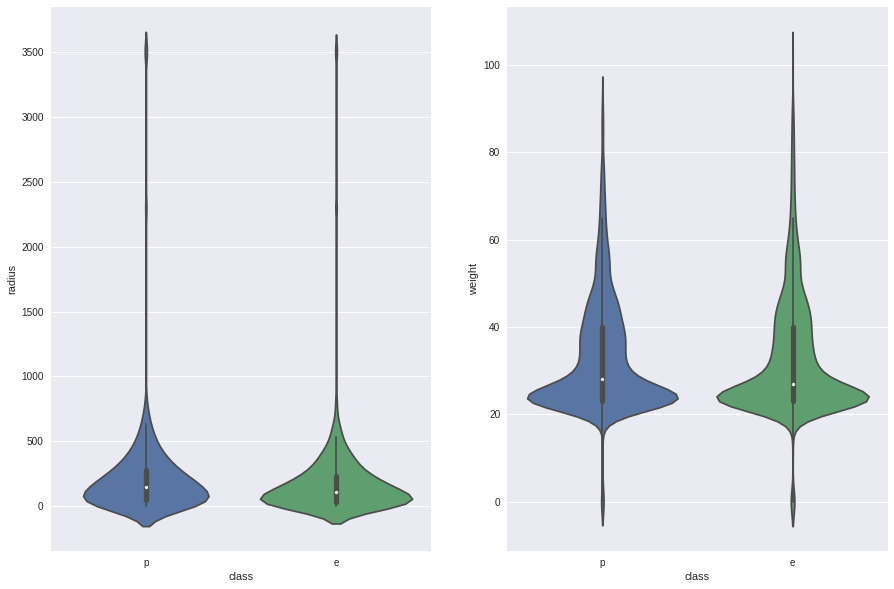

In [11]:
# violinplots here
f, axes = plt.subplots(ncols = 2, figsize = (15,10))
sns.violinplot(x = train_set['class'], y = train_set['radius'], ax = axes[0])
sns.violinplot(x = train_set['class'], y = train_set['weight'], ax = axes[1])
plt.show()

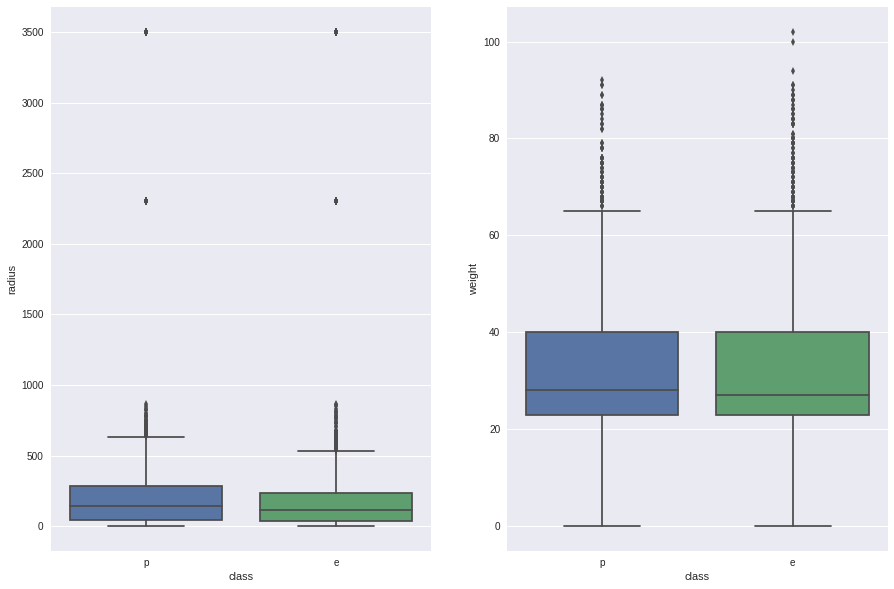

In [12]:
# barplots here
f, axes = plt.subplots(ncols = 2, figsize = (15,10))
sns.boxplot(x = train_set['class'], y = train_set['radius'], ax = axes[0])
sns.boxplot(x = train_set['class'], y = train_set['weight'], ax = axes[1])
sns.despine()

Some conclusions drawn from the violinplots and boxplots:

1. there is no major difference in the distribution of *radii* or *weights* for both the *classes* and hence they not be as effective in classification
2. there are a number of **outliers** for both *radii* and *weight* and hence, they make require treatment before any predictive modeling is carried out

A simple bi-variate analysis is also carried out between *radius* and *weight*.

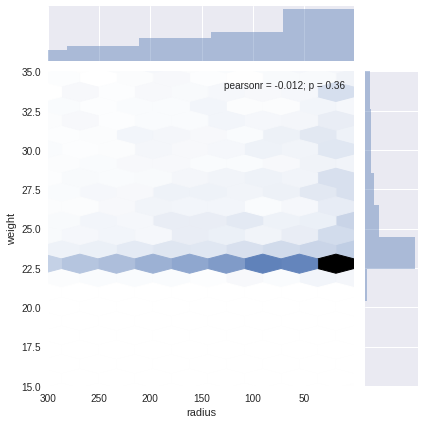

In [13]:
# hexbinplot (better than a jointplot)
sns.jointplot(x = train_set['radius'], y = train_set['weight'], kind = 'hex', xlim = 300,
             ylim = (15,35))
sns.despine()

**IMPORTANT**

The axes of the above plot do not start at 0 on both axes neither does it end at the last values. Please take that into consideration while interpreting the plot.

In [14]:
train_set.corr()

,radius,weight
radius,1.000000,-0.012035
weight,-0.012035,1.000000


Conclusion:

No correlation is apparent between the two which is also supported by the low value of Pearson's coefficient.

High correlations(not present here) can sometimes mess with our interpretation of $\beta$s without explicitly affecting the results of the classification method.

Some grouped barcharts have been plotted below to split each bar according to the *class*.

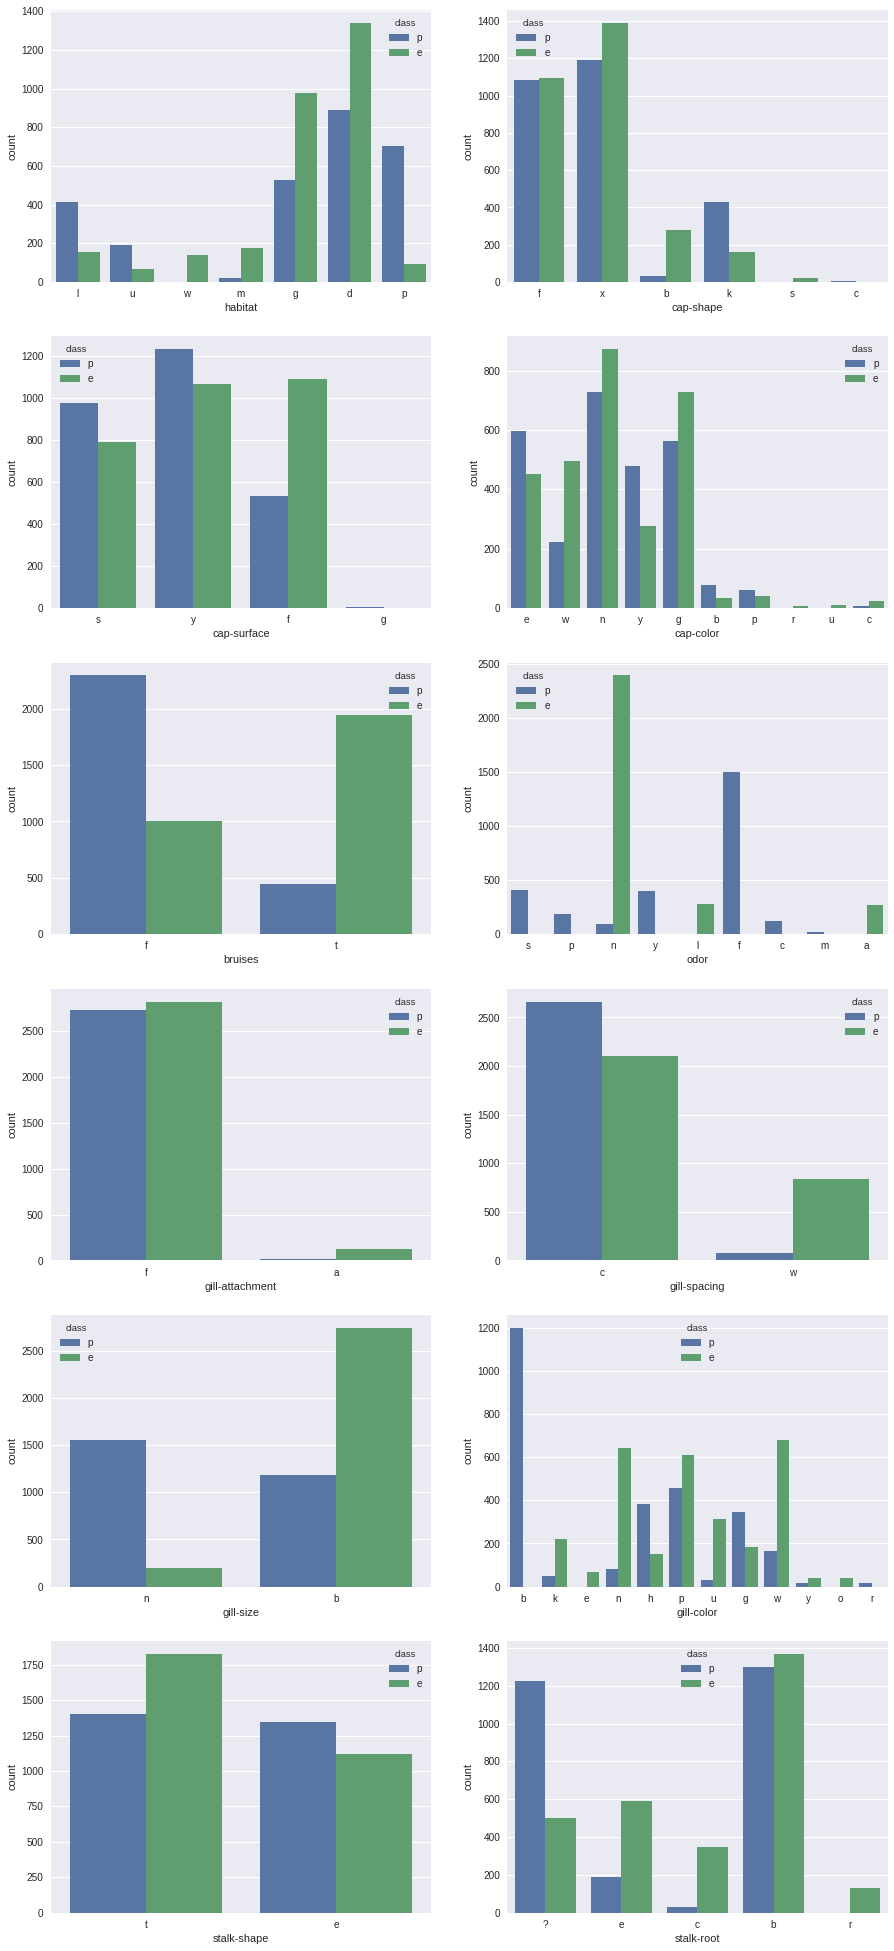

In [15]:
# grouped bar charts here
f, axes = plt.subplots(ncols = 2, nrows = 6, figsize = (15,35))

sns.countplot(x = train_set['habitat'], ax = axes[0][0], hue = train_set['class'])
sns.countplot(x = train_set['cap-shape'], ax = axes[0][1], hue = train_set['class'])
sns.countplot(x = train_set['cap-surface'], ax = axes[1][0], hue = train_set['class'])
sns.countplot(x = train_set['cap-color'], ax = axes[1][1], hue = train_set['class'])
sns.countplot(x = train_set['bruises'], ax = axes[2][0], hue = train_set['class'])
sns.countplot(x = train_set['odor'], ax = axes[2][1], hue = train_set['class'])
sns.countplot(x = train_set['gill-attachment'], ax = axes[3][0], hue = train_set['class'])
sns.countplot(x = train_set['gill-spacing'], ax = axes[3][1], hue = train_set['class'])
sns.countplot(x = train_set['gill-size'], ax = axes[4][0], hue = train_set['class'])
sns.countplot(x = train_set['gill-color'], ax = axes[4][1], hue = train_set['class'])
sns.countplot(x = train_set['stalk-shape'], ax = axes[5][0], hue = train_set['class'])
sns.countplot(x = train_set['stalk-root'], ax = axes[5][1], hue = train_set['class'])
plt.show()

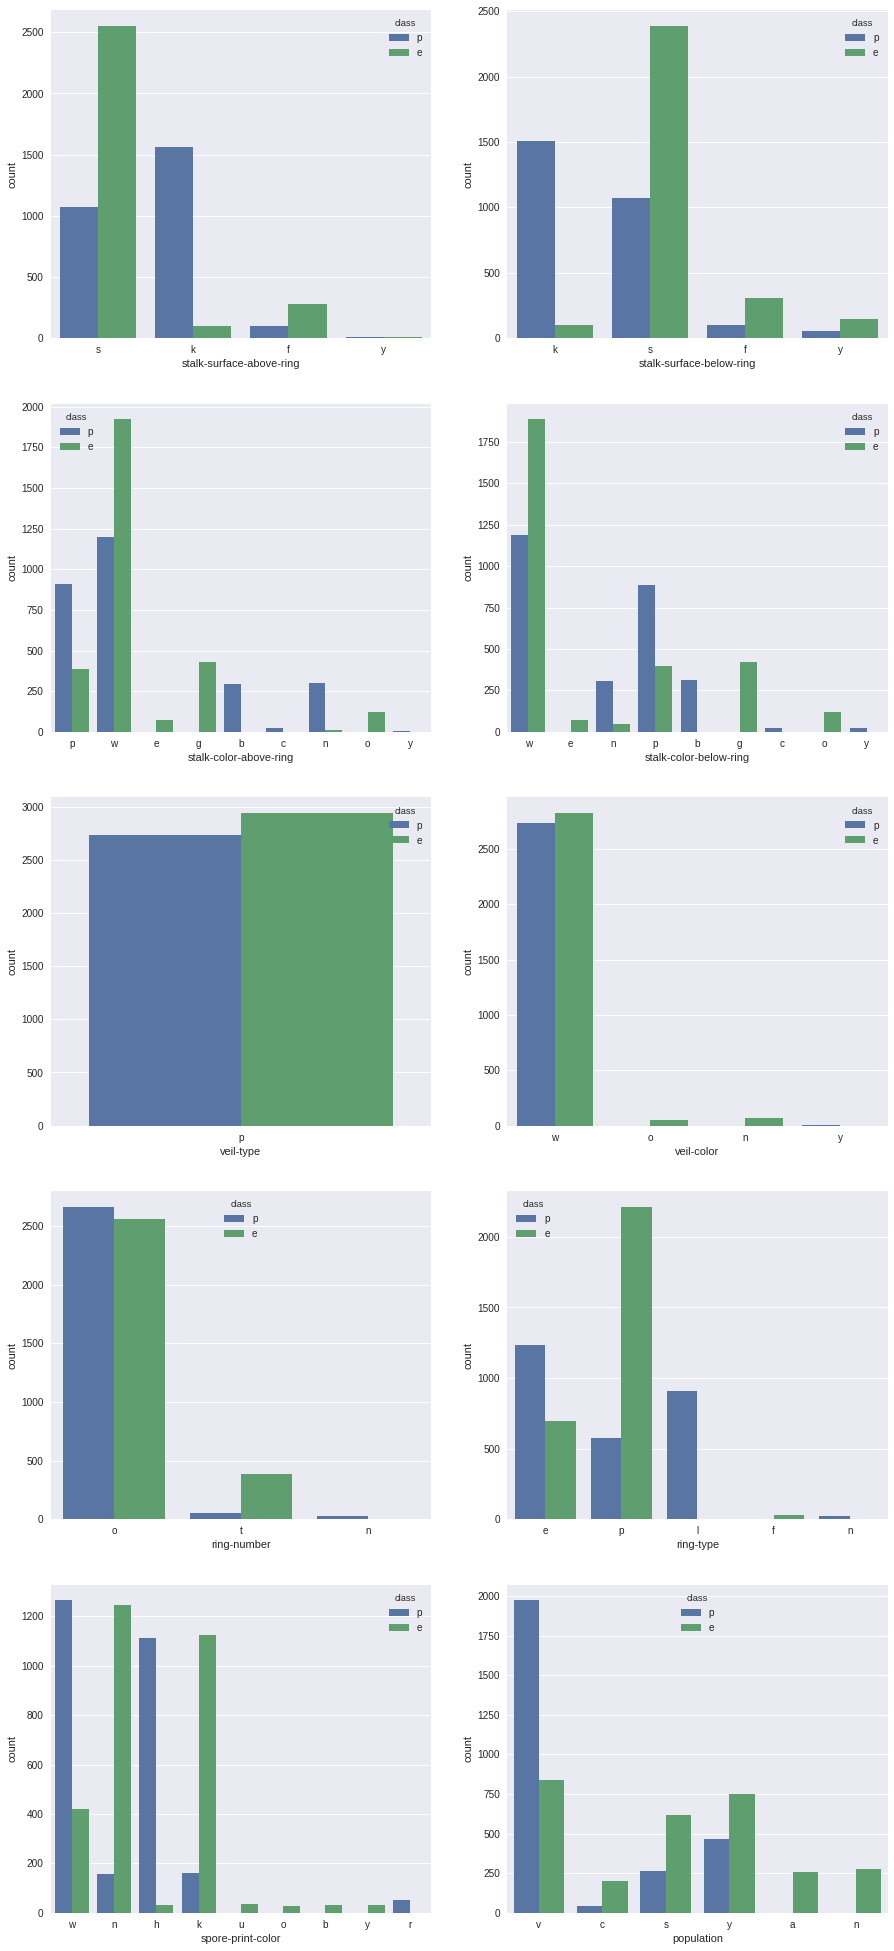

In [16]:
# some more grouped bar charts
f, axes = plt.subplots(ncols = 2, nrows = 5, figsize = (15,35))

sns.countplot(x = train_set['stalk-surface-above-ring'], ax = axes[0][0], hue = train_set['class'])
sns.countplot(x = train_set['stalk-surface-below-ring'], ax = axes[0][1], hue = train_set['class'])
sns.countplot(x = train_set['stalk-color-above-ring'], ax = axes[1][0], hue = train_set['class'])
sns.countplot(x = train_set['stalk-color-below-ring'], ax = axes[1][1], hue = train_set['class'])
sns.countplot(x = train_set['veil-type'], ax = axes[2][0], hue = train_set['class'])
sns.countplot(x = train_set['veil-color'], ax = axes[2][1], hue = train_set['class'])
sns.countplot(x = train_set['ring-number'], ax = axes[3][0], hue = train_set['class'])
sns.countplot(x = train_set['ring-type'], ax = axes[3][1], hue = train_set['class'])
sns.countplot(x = train_set['spore-print-color'], ax = axes[4][0], hue = train_set['class'])
sns.countplot(x = train_set['population'], ax = axes[4][1], hue = train_set['class'])
plt.show()

The above graphs give the *class*-wise distribution of the various categories of all categorical features.

It may be preferred sometimes that the two *classes* have similar distribution of datapoints within a feature for better results in some classification techniques.

In [17]:
# printing a representative set of values 
train_set.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,t,?,215,s,k,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,e,e,94,s,s,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,e,?,244,s,s,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,t,?,286,k,s,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,e,c,110,s,s,w,w,p,w,36,o,p,n,s,m
5,p,x,f,y,f,f,f,c,b,h,e,b,66,k,k,p,n,p,w,23,o,l,h,y,g
6,e,f,s,g,f,n,f,w,b,p,t,e,11,s,s,w,w,p,w,43,o,e,n,a,g
7,e,f,f,n,t,n,f,c,b,u,t,b,207,s,s,g,w,p,w,25,o,p,n,v,d
8,p,x,y,e,f,f,f,c,n,b,t,?,60,s,s,p,p,p,w,50,o,e,w,v,p
9,p,x,s,g,t,f,f,c,b,h,t,b,84,s,s,w,w,p,w,47,o,p,h,v,g


In [18]:
test_set.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,b,32,s,s,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,b,7,k,k,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,c,2,s,s,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,b,2,k,k,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,c,10,s,s,w,w,p,w,24,o,p,k,n,m
5,f,f,y,f,f,f,c,b,h,e,b,89,k,k,n,b,p,w,23,o,l,h,y,d
6,x,f,p,f,c,f,c,n,n,e,b,44,s,s,w,w,p,w,24,o,p,n,s,d
7,k,s,n,f,n,a,c,b,n,e,?,564,s,s,o,o,p,o,24,o,p,b,v,l
8,f,y,n,t,n,f,c,b,p,t,b,67,s,s,p,w,p,w,23,o,p,n,v,d
9,f,s,w,t,f,f,c,b,h,t,b,17,s,s,w,w,p,w,23,o,p,h,v,u


#### Label Encoding

In [19]:
encoded_train_set = train_set
encoded_test_set = test_set

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# continuous features are being skipped during label encoding
# for test_set, "class" is also being skipped
for i in train_set:
    if i != 'radius' and i != 'weight':
        le.fit(train_set[i].unique())
        encoded_train_set[i] = le.transform(train_set[i])
        if i != 'class':
            encoded_test_set[i] = le.transform(test_set[i])

In [20]:
encoded_train_set.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,2,2,0,7,1,0,1,0,1,0,215,2,1,6,7,0,2,38,1,0,7,4,2
1,1,5,3,8,1,6,1,0,1,4,0,3,94,2,2,7,7,0,2,43,1,4,3,4,5
2,0,2,2,4,1,5,1,0,0,1,0,0,244,2,2,2,2,0,2,37,2,0,7,1,6
3,1,5,2,2,0,8,1,0,1,0,1,0,286,1,2,6,7,0,2,82,1,0,7,4,2
4,0,5,2,8,1,3,1,0,0,5,0,2,110,2,2,7,7,0,2,36,1,4,3,3,3
5,1,5,0,9,0,2,1,0,0,3,0,1,66,1,1,6,4,0,2,23,1,2,1,5,1
6,0,2,2,3,0,5,1,1,0,7,1,3,11,2,2,7,7,0,2,43,1,0,3,0,1
7,0,2,0,4,1,5,1,0,0,9,1,1,207,2,2,3,7,0,2,25,1,4,3,4,0
8,1,5,3,2,0,2,1,0,1,0,1,0,60,2,2,6,6,0,2,50,1,0,7,4,4
9,1,5,2,3,1,2,1,0,0,3,1,1,84,2,2,7,7,0,2,47,1,4,1,4,1


In [21]:
encoded_test_set.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,5,0,3,1,5,1,0,0,9,1,1,32,2,2,6,3,0,2,23,1,4,2,5,0
1,5,3,3,0,2,1,0,0,2,0,1,7,1,1,0,0,0,2,23,1,2,1,4,0
2,0,2,8,1,0,1,0,0,10,0,2,2,2,2,7,7,0,2,24,1,4,2,3,3
3,2,3,9,0,2,1,0,0,7,0,1,2,1,1,4,0,0,2,53,1,2,1,5,0
4,0,3,9,1,0,1,0,0,10,0,2,10,2,2,7,7,0,2,24,1,4,2,2,3
5,2,0,9,0,2,1,0,0,3,0,1,89,1,1,4,0,0,2,23,1,2,1,5,0
6,5,0,5,0,1,1,0,1,5,0,1,44,2,2,7,7,0,2,24,1,4,3,3,0
7,3,2,4,0,5,0,0,0,5,0,0,564,2,2,5,5,0,1,24,1,4,0,4,2
8,2,3,4,1,5,1,0,0,7,1,1,67,2,2,6,7,0,2,23,1,4,3,4,0
9,2,2,8,1,2,1,0,0,3,1,1,17,2,2,7,7,0,2,23,1,4,1,4,5


### Missing value treatment

The missing values can be treated via the following four methods:

1. Deletion
2. Mean/Median/Mode filling
3. Prediction Model
4. KNN


* Considering the various merits and demerits,a *Prediction Model* in the form of a *Decision Tree* is used here.
* The missing values exist in *stalk-root* and are encoded as *?* in *train_set* and *0* in *encoded_train_set*.
* The values of *class* will not be used in the prediction model training as they are available for *test_set*

In [22]:
# here all observations having missing values are separated
stalkroot_test = encoded_train_set[encoded_train_set['stalk-root'] == 0]
stalkroot_test.drop('class',axis = 1, inplace = True)
stalkroot_test.head()

/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,2,2,2,0,7,1,0,1,0,1,0,215,2,1,6,7,0,2,38,1,0,7,4,2
2,2,2,4,1,5,1,0,0,1,0,0,244,2,2,2,2,0,2,37,2,0,7,1,6
3,5,2,2,0,8,1,0,1,0,1,0,286,1,2,6,7,0,2,82,1,0,7,4,2
8,5,3,2,0,2,1,0,1,0,1,0,60,2,2,6,6,0,2,50,1,0,7,4,4
10,5,2,4,0,8,1,0,1,0,1,0,385,1,2,6,6,0,2,34,1,0,7,4,0


In [23]:
stalkroot_test.shape

(1727, 24)

In [24]:
# here all observations NOT having missing values are kept
stalkroot_train = encoded_train_set[encoded_train_set['stalk-root'] != 0]
stalkroot_train.drop('class', axis = 1, inplace = True)
stalkroot_train.head()

/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
1,5,3,8,1,6,1,0,1,4,0,3,94,2,2,7,7,0,2,43,1,4,3,4,5
4,5,2,8,1,3,1,0,0,5,0,2,110,2,2,7,7,0,2,36,1,4,3,3,3
5,5,0,9,0,2,1,0,0,3,0,1,66,1,1,6,4,0,2,23,1,2,1,5,1
6,2,2,3,0,5,1,1,0,7,1,3,11,2,2,7,7,0,2,43,1,0,3,0,1
7,2,0,4,1,5,1,0,0,9,1,1,207,2,2,3,7,0,2,25,1,4,3,4,0


In [25]:
stalkroot_train.shape

(3959, 24)

In [26]:
# separating target and predictor variables
y_train = stalkroot_train['stalk-root']
x_train = stalkroot_train.drop('stalk-root', axis = 1)

In [27]:
y_train.shape, x_train.shape

((3959,), (3959, 23))

In [28]:
# using a decison-tree as a classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [29]:
# performing a k-fold cross-validation on the tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, x_train, y_train, cv = 10)
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

The scores show that the tree performs well in classification. Therefore, fitting can now be performed.

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [31]:
dt.tree_.n_node_samples

array([3959, 1240,  600,   99,  501,  438,  350,   88,   24,   64,   63,
        640,  624,   16,    8,    8, 2719, 2630, 2549, 2434,  115,   48,
         67,   81,   13,   68,   89])

In [32]:
dt.tree_.node_count

27

In [33]:
dt.tree_.max_depth

6

In [34]:
dt.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.30113889,
        0.        ,  0.        ,  0.04893699,  0.        ,  0.        ,
        0.        ,  0.        ,  0.09222178,  0.        ,  0.01513976,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.09640451,  0.40831907,  0.037839  ])

In [35]:
# joining back
x_train['stalk-root'] = y_train

* Some nodes have quite a small number of training samples which might point towards some overfit but that is being ignored here.
* The importance of many features is 0 which suggests that they may be dropped to reduce model complexity.

Now that the model has been fitted, we can start predicting the missing values.

In [36]:
# dropping the missing value column
x_test = stalkroot_test.drop('stalk-root', axis = 1)
x_test.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,2,2,2,0,7,1,0,1,0,1,215,2,1,6,7,0,2,38,1,0,7,4,2
2,2,2,4,1,5,1,0,0,1,0,244,2,2,2,2,0,2,37,2,0,7,1,6
3,5,2,2,0,8,1,0,1,0,1,286,1,2,6,7,0,2,82,1,0,7,4,2
8,5,3,2,0,2,1,0,1,0,1,60,2,2,6,6,0,2,50,1,0,7,4,4
10,5,2,4,0,8,1,0,1,0,1,385,1,2,6,6,0,2,34,1,0,7,4,0
15,5,3,8,0,5,1,0,1,7,0,264,2,0,7,7,0,2,23,1,1,1,4,0
18,2,2,4,0,8,1,0,1,0,1,298,1,2,6,7,0,2,23,1,0,7,4,2
20,2,2,2,0,7,1,0,1,0,1,782,1,2,6,7,0,2,38,1,0,7,4,4
21,0,2,3,0,5,1,1,0,7,0,262,1,1,7,7,0,2,23,2,4,7,3,1
27,2,2,2,0,8,1,0,1,0,1,417,1,2,7,7,0,2,46,1,0,7,4,0


In [37]:
x_test.shape

(1727, 23)

In [38]:
# predicting the missing column
y_test = dt.predict(x_test)
print len(y_test)
print 2 in y_test
y_test

1727
False


array([3, 1, 3, ..., 1, 1, 3])

In [39]:
# joining the predictions as a column in the x_test
x_test['stalk-root'] = y_test
x_test.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,stalk-root
0,2,2,2,0,7,1,0,1,0,1,215,2,1,6,7,0,2,38,1,0,7,4,2,3
2,2,2,4,1,5,1,0,0,1,0,244,2,2,2,2,0,2,37,2,0,7,1,6,1
3,5,2,2,0,8,1,0,1,0,1,286,1,2,6,7,0,2,82,1,0,7,4,2,3
8,5,3,2,0,2,1,0,1,0,1,60,2,2,6,6,0,2,50,1,0,7,4,4,1
10,5,2,4,0,8,1,0,1,0,1,385,1,2,6,6,0,2,34,1,0,7,4,0,3
15,5,3,8,0,5,1,0,1,7,0,264,2,0,7,7,0,2,23,1,1,1,4,0,1
18,2,2,4,0,8,1,0,1,0,1,298,1,2,6,7,0,2,23,1,0,7,4,2,3
20,2,2,2,0,7,1,0,1,0,1,782,1,2,6,7,0,2,38,1,0,7,4,4,3
21,0,2,3,0,5,1,1,0,7,0,262,1,1,7,7,0,2,23,2,4,7,3,1,1
27,2,2,2,0,8,1,0,1,0,1,417,1,2,7,7,0,2,46,1,0,7,4,0,3


In [40]:
new_train = pd.concat([x_train, x_test])
new_train.sort_index(inplace=True)
new_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,stalk-root
0,2,2,2,0,7,1,0,1,0,1,215,2,1,6,7,0,2,38,1,0,7,4,2,3
1,5,3,8,1,6,1,0,1,4,0,94,2,2,7,7,0,2,43,1,4,3,4,5,3
2,2,2,4,1,5,1,0,0,1,0,244,2,2,2,2,0,2,37,2,0,7,1,6,1
3,5,2,2,0,8,1,0,1,0,1,286,1,2,6,7,0,2,82,1,0,7,4,2,3
4,5,2,8,1,3,1,0,0,5,0,110,2,2,7,7,0,2,36,1,4,3,3,3,2


This does not contain the class column which will be obtained from *encoded_train_set*.

In [41]:
new_train_y = encoded_train_set['class']
new_train_y.head()

0    1
1    1
2    0
3    1
4    0
Name: class, dtype: int64

The same methodology will now be applied to treat the missing values in *encoded_test_set* but now that we have the classifier already fit on model, there does not seem to be an explicit need to train the model again; it can be applied directly to predict the values.

In [42]:
# separating clean and missing parts of the encoded_test_set
clean_test_set = encoded_test_set[encoded_test_set['stalk-root'] != 0]
missing_test_set = encoded_test_set[encoded_test_set['stalk-root'] == 0]
clean_test_set.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,5,0,3,1,5,1,0,0,9,1,1,32,2,2,6,3,0,2,23,1,4,2,5,0
1,5,3,3,0,2,1,0,0,2,0,1,7,1,1,0,0,0,2,23,1,2,1,4,0
2,0,2,8,1,0,1,0,0,10,0,2,2,2,2,7,7,0,2,24,1,4,2,3,3
3,2,3,9,0,2,1,0,0,7,0,1,2,1,1,4,0,0,2,53,1,2,1,5,0
4,0,3,9,1,0,1,0,0,10,0,2,10,2,2,7,7,0,2,24,1,4,2,2,3


In [43]:
missing_test_set.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
7,3,2,4,0,5,0,0,0,5,0,0,564,2,2,5,5,0,1,24,1,4,0,4,2
15,2,2,2,0,2,1,0,1,0,1,0,27,2,2,6,7,0,2,26,1,0,7,4,4
16,5,3,2,1,5,1,0,0,1,0,0,206,2,2,7,7,0,2,44,2,0,7,1,6
22,3,2,4,0,8,1,0,1,0,1,0,823,2,1,7,6,0,2,38,1,0,7,4,0
25,3,2,4,1,5,1,0,0,10,0,0,21,2,2,2,7,0,2,25,2,0,7,1,6


In [44]:
# dropping the missing column
missing_test_set.drop('stalk-root', axis = 1, inplace = True)
missing_test_set.head()

/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
7,3,2,4,0,5,0,0,0,5,0,564,2,2,5,5,0,1,24,1,4,0,4,2
15,2,2,2,0,2,1,0,1,0,1,27,2,2,6,7,0,2,26,1,0,7,4,4
16,5,3,2,1,5,1,0,0,1,0,206,2,2,7,7,0,2,44,2,0,7,1,6
22,3,2,4,0,8,1,0,1,0,1,823,2,1,7,6,0,2,38,1,0,7,4,0
25,3,2,4,1,5,1,0,0,10,0,21,2,2,2,7,0,2,25,2,0,7,1,6


In [45]:
# predicting the values using the classifier
missing_test_set_y = dt.predict(missing_test_set)
missing_test_set_y

array([1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 1, 1, 3, 4, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1,
       1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       1, 1,

In [46]:
# concatenating and making a clean test dataset
missing_test_set['stalk-root'] = missing_test_set_y
new_test = pd.concat([clean_test_set, missing_test_set])

/home/yash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
new_test.sort_index(inplace=True)

It was also observed that the column *veil-type* had same value throughout in the (now)new_train dataframe. If the same is true for (now)new_test, then the column can be entirely dropped as it won't affect the predictive model much.

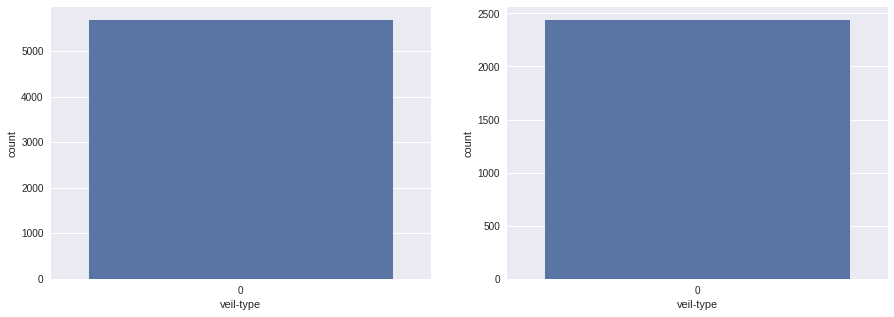

In [48]:
# plotting some countplots to check the veil-type column
f, axes = plt.subplots(ncols=2, figsize = (15,5))
sns.countplot(x = new_train['veil-type'], ax = axes[0])
sns.countplot(x = new_test['veil-type'], ax = axes[1])
sns.despine()

It is apparent that the column has same value throughout and will not affect the prediction model. Therefore, they are being dropped.

In [49]:
# dropping the columns
new_train.drop('veil-type', axis = 1, inplace = True)
new_test.drop('veil-type', axis = 1, inplace = True)
new_train.shape, new_test.shape

((5686, 23), (2438, 23))

### Some summary explanation

To prevent confusion, certain points are iterated over here purely for clarity purposes:

* the train dataset now is **new_train**
* the *class* values for **new_train** are stored in **new_train_y**
* the test dataset now is **new_test**


* the missing values in *stalk-root* have been treated
* the veil-type column has been taken care of


## Final Model Application

The final model will be applied after testing approaches in a sequential manner. If accuracy is achieved early, then brief overview will be done of some boosting technoques.

First we start with **Logistic Regression**.

In [50]:
new_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,radius,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,stalk-root
0,2,2,2,0,7,1,0,1,0,1,215,2,1,6,7,2,38,1,0,7,4,2,3
1,5,3,8,1,6,1,0,1,4,0,94,2,2,7,7,2,43,1,4,3,4,5,3
2,2,2,4,1,5,1,0,0,1,0,244,2,2,2,2,2,37,2,0,7,1,6,1
3,5,2,2,0,8,1,0,1,0,1,286,1,2,6,7,2,82,1,0,7,4,2,3
4,5,2,8,1,3,1,0,0,5,0,110,2,2,7,7,2,36,1,4,3,3,3,2


In [51]:
new_train_y.head()

0    1
1    1
2    0
3    1
4    0
Name: class, dtype: int64

In [52]:
# setting up Logistic Regression
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(class_weight='balanced', C = 0.1)

In [54]:
scores = cross_val_score(lr, new_train, new_train_y, cv = 10)
scores

array([ 0.93684211,  0.94551845,  0.94727592,  0.92267135,  0.95606327,
        0.94190141,  0.93485915,  0.93838028,  0.92605634,  0.95598592])

In [55]:
np.mean(scores)

0.94055542020972371

A little parameter tuning does not yield results with significant improvement in accuracy.

* **K-Nearest Neighbours** not applied due to accuracy reasons.
* **Support Vector Machines** not applied because of high training time. However, example code given below.

A **Decision Tree** is applied next. **Random Forests** as they can lead to severe overfitting of the model.

In [56]:
dt = DecisionTreeClassifier(criterion='gini')

In [57]:
scores = cross_val_score(dt, new_train, new_train_y, cv = 10)
scores

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.99823944,  1.        ])

In [58]:
np.mean(scores)

0.9998239436619718

Accuracy of 1.0 achieved here. The tree is then fitted and explored a little more.

In [59]:
dt.fit(new_train, new_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [60]:
dt.tree_.n_node_samples

array([5686, 2326,  423,   35,  388,   16,  372, 1903, 1867,   17,    7,
         10, 1850,   36,   19,   17, 3360,  491,  437,   54, 2869, 2398,
         24, 2374, 2097,  277,   35,  242,  471,  403,  212,  191,   91,
         83,    8,  100,   68])

In [61]:
dt.tree_.node_count

37

In [62]:
dt.tree_.max_depth

7

In [63]:
dt.feature_importances_

array([ 0.        ,  0.00922036,  0.        ,  0.02791862,  0.03385371,
        0.        ,  0.        ,  0.1188972 ,  0.33104424,  0.02584017,
        0.        ,  0.        ,  0.00410574,  0.02138601,  0.        ,
        0.        ,  0.        ,  0.00275161,  0.        ,  0.21196649,
        0.18205558,  0.03096028,  0.        ])

The very low number of training samples in some nodes point towards an overfit of data. It is momentarily ignored here.

The "0" importance given to some features suggest that they are not as important and can be dropped to reduce model complexity.


Because it is not explicitly necessary, only one of the ensemble methods i.e. **AdaBoost** is shown below.

In [64]:
# splitting the data into test and training samples
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_train, new_train_y, test_size = 0.33,
                                                   random_state = 42)

/home/yash/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(base_estimator = dt, learning_rate = 1)

In [66]:
clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(predict, y_test)

1.0

In [69]:
clf.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.03182693,  0.03206532,
        0.        ,  0.        ,  0.13746618,  0.33227562,  0.02820788,
        0.        ,  0.        ,  0.00512268,  0.0056445 ,  0.0111043 ,
        0.        ,  0.        ,  0.00368874,  0.        ,  0.21192745,
        0.18140177,  0.01926864,  0.        ])

In [70]:
clf.fit(new_train, new_train_y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=50, random_state=None)

In [71]:
new_test_y = clf.predict(new_test)
new_test_y

array([0, 1, 0, ..., 0, 1, 0])

### Further analyses not done here

Some methods, though highly recommended, were not carried out here:

1. Certain tests like chi-square, ANOVA etc. were skipped. They can be used to test the significance and dependency of variables etc.
2. Ensemble methods such as GBM, XGB etc. were skipped but can be used to provide accuracy to the model.
3. Certain metrics other than accuracy should also be optimised which was not done here
4. Scaling of model not done.
5. Outliers not treated.